## A brief healthcare development indicator overview for developed and underdeveloped countries

###### Healthcare Analytics 304

Group 6:
    Akshay Joshi - 0773818
    Akhil Nandakumar - 0775505
    Shrikant Narawane - 0775146
    Vijayalaxmi Rohane - 0775039

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization

from sklearn.model_selection import train_test_split # for Train-Test data split
from sklearn.ensemble import RandomForestRegressor # for creating Random forest model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_absolute_error, r2_score

from datetime import datetime
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

In [2]:
# loading the data, wrt sheet name and skipping the footer

data = pd.read_excel ('Data_Extract_From_World_Development_Indicators (1).xlsx',sheet_name='Data', skipfooter=5)
#print (df)

In [3]:
# checking the rows and columns of data 
data.shape

(400, 40)

In [4]:
# checking sample data
data.head()

,Time,Time Code,Country Name,Country Code,"Population, total [SP.POP.TOTL]","Community health workers (per 1,000 people) [SH.MED.CMHW.P3]",Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],...,Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Military expenditure (current USD) [MS.MIL.XPND.CD],"Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]","Nurses and midwives (per 1,000 people) [SH.MED.NUMW.P3]",Population growth (annual %) [SP.POP.GROW]
0,1996,YR1996,Afghanistan,AFG,18853444,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,4.019478
1,1996,YR1996,Bangladesh,BGD,117649927,..,..,..,..,..,...,..,..,4.64385e+10,4.52292,394.717,1.53907,6.38959e+08,..,..,2.130478
2,1996,YR1996,Belarus,BLR,10160000,..,..,..,..,..,...,..,..,1.47568e+10,2.8,1452.45,1.26069,1.82806e+08,12.27,7.9521,-0.334087
3,1996,YR1996,Bolivia,BOL,7779268,..,..,..,..,..,...,5.88,9.02,7.39697e+09,4.36134,950.856,1.98681,1.46963e+08,1.67,..,2.037962
4,1996,YR1996,Canada,CAN,29610218,..,..,..,..,..,...,15.56,7.02,6.28546e+11,..,21227.3,1.40375,8.61588e+09,4.6,..,1.045312


In [5]:
# filtering out data from 2000 , coz lots of missing values before year 2000 
data=data[(data['Time'] >=2000) & (data['Time'] <=2018)]

In [6]:
# dropping unneccessary columns
drop_cols=["Time Code",
           "Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]",
           "Domestic private health expenditure per capita, PPP (current international $) [SH.XPD.PVTD.PP.CD]",
           "External health expenditure per capita, PPP (current international $) [SH.XPD.EHEX.PP.CD]",
           "Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) [per_lm_alllm.adq_pop_tot]",
           "Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot]"
          ]

data.drop(drop_cols, axis=1, inplace=True)

In [7]:
# renaming the columns
data.rename(columns=
            {"Population, total [SP.POP.TOTL]":"Total Population"
            ,"Community health workers (per 1,000 people) [SH.MED.CMHW.P3]":"Community health workers per 1000 people"
            ,"Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]":"Current health expenditure (% of GDP)"
            ,"Domestic general government health expenditure (% of current health expenditure) [SH.XPD.GHED.CH.ZS]":"Domestic government health expenditure (% of current health expenditure)"
            ,"Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]":"Current health expenditure per capita"
            ,"Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]":"Domestic government health expenditure (% of GDP)"
            ,"Domestic general government health expenditure (% of general government expenditure) [SH.XPD.GHED.GE.ZS]":"Domestic government health expenditure (% of government expenditure)"
            ,"Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]":"Domestic government health expenditure per capita"
            ,"Domestic private health expenditure (% of current health expenditure) [SH.XPD.PVTD.CH.ZS]":"Domestic private health expenditure (% of current health expenditure)"
            ,"Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD]":"Domestic private health expenditure per capita"
            ,"Increase in poverty gap at $1.90 ($ 2011 PPP) poverty line due to out-of-pocket health care expenditure (% of poverty line) [SH.UHC.NOP1.ZG]":"Poverty line due to out-of-pocket health care expenditure (% of poverty line)"
            ,"Increase in poverty gap at $1.90 ($ 2011 PPP) poverty line due to out-of-pocket health care expenditure (USD) [SH.UHC.NOP1.CG]":"Poverty line due to out-of-pocket health care expenditure"
            ,"External health expenditure (% of current health expenditure) [SH.XPD.EHEX.CH.ZS]":"External health expenditure (% of current health expenditure)"
            ,"External health expenditure per capita (current US$) [SH.XPD.EHEX.PC.CD]":"External health expenditure per capita"
            ,"Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]":"% Children in employment"
            ,"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]":"Mortality rate, infant (per 1,000 live births)"
            ,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%) [SH.DYN.NCOM.ZS]":"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)"
            ,"Mortality caused by road traffic injury (per 100,000 population) [SH.STA.TRAF.P5]":"Mortality caused by road traffic injury (per 100,000 population)"
            ,"Suicide mortality rate (per 100,000 population) [SH.STA.SUIC.P5]":"Suicide mortality rate (per 100,000 population)"
            ,"Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]":"Mortality rate, adult, female (per 1,000 female adults)"
            ,"Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]":"Mortality rate, adult, male (per 1,000 male adults)"
            ,"Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS]":"% of total unemployed labor force with basic education"
            ,"Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS]":"% of total unemployed labor force with advanced education"	
            ,"GDP (current US$) [NY.GDP.MKTP.CD]":"GDP (current US$)"
            ,"GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]":"GDP growth (annual %)"
            ,"GDP per capita (current US$) [NY.GDP.PCAP.CD]":"GDP per capita (current US$)"
            ,"Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]":"Military expenditure (% of GDP)"	
            ,"Military expenditure (current USD) [MS.MIL.XPND.CD]":"Military expenditure (current USD)"	
            ,"Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]":"Hospital beds (per 1,000 people)"
            ,"Nurses and midwives (per 1,000 people) [SH.MED.NUMW.P3]":"Nurses and midwives (per 1,000 people)"
            ,"Population growth (annual %) [SP.POP.GROW]":"Population growth (annual %)"
            }, inplace=True)

In [8]:
data.head()

,Time,Country Name,Country Code,Total Population,Community health workers per 1000 people,Current health expenditure (% of GDP),Domestic government health expenditure (% of current health expenditure),Current health expenditure per capita,Domestic government health expenditure (% of GDP),Domestic government health expenditure (% of government expenditure),...,% of total unemployed labor force with basic education,% of total unemployed labor force with advanced education,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Military expenditure (% of GDP),Military expenditure (current USD),"Hospital beds (per 1,000 people)","Nurses and midwives (per 1,000 people)",Population growth (annual %)
64,2000,Afghanistan,AFG,20779957,..,..,..,..,..,..,...,..,..,..,..,..,..,..,0.3,..,2.975057
65,2000,Bangladesh,BGD,127657862,..,2.00195,28.6905,8.56026,0.574369,5.20979,...,..,..,5.33698e+10,5.29329,418.069,1.35712,7.40798e+08,..,..,1.952390
66,2000,Belarus,BLR,9979610,..,5.46676,78.6655,57.6682,4.30438,12.1293,...,..,..,1.27389e+10,5.8,1276.49,1.34698,1.40326e+08,12.61,9.6648,-0.471131
67,2000,Bolivia,BOL,8418270,..,4.39554,55.3292,43.8484,2.43202,8.29598,...,3.57,11.4,8.39791e+09,2.50781,997.582,2.06297,1.73245e+08,..,..,1.933503
68,2000,Canada,CAN,30685730,..,8.27568,72.8516,2007.88,6.02897,14.8156,...,12.52,4.7,7.44773e+11,4.91776,24271,1.11808,8.29939e+09,3.77,..,0.931282


In [9]:
# replacing empty values by nan
data = data.replace('..', np.NaN)   

In [10]:
# fixing null values with mean values
data=data.fillna(data.mean())

<ipython-input-12-e20b493487d6>:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

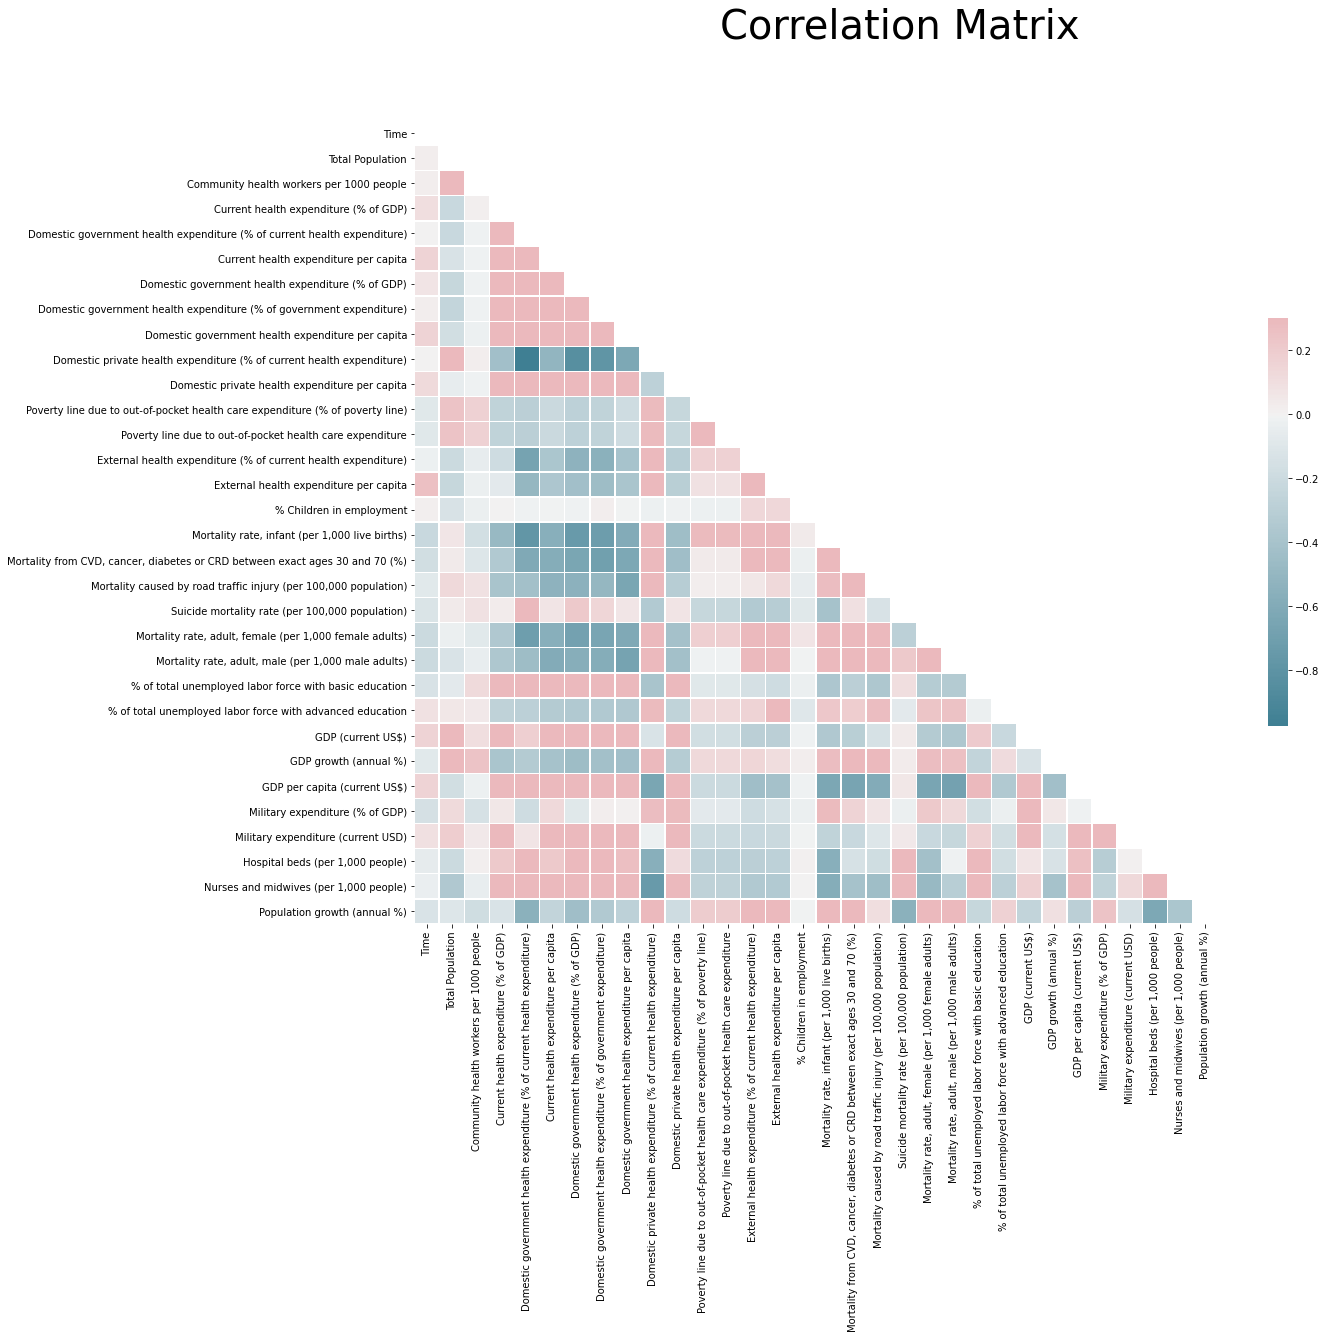

In [12]:
# Calculating correlation matrix
#corr = data.corr()
corr_matrix = data.corr()#.abs()


# plotting heat map on the basis of correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

<ipython-input-13-7643f18e89db>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [14]:
to_drop

['Domestic government health expenditure per capita',
 'Poverty line due to out-of-pocket health care expenditure',
 'GDP per capita (current US$)']

In [15]:
# dropping columns with high correlations
data.drop(to_drop, axis=1, inplace=True)


In [16]:
# converting the year column from int to datetime 
data['Time_dt'] = data.Time.map(lambda x: pd.to_datetime(f'{x}-01-01'))

In [17]:
# saving the cleaned file
data.to_csv('Cleaned_data_final.csv', index=False)

In [18]:
# encoding country column

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

data["Country Code"]=labelencoder.fit_transform(data["Country Code"])

In [19]:
# Model building 

X = data[[  "Country Code"
            ,"Total Population"
            ,"Community health workers per 1000 people"
            ,"Domestic government health expenditure (% of current health expenditure)"
            ,"Current health expenditure per capita"
            ,"Domestic government health expenditure (% of GDP)"
            ,"Domestic government health expenditure (% of government expenditure)"
           # ,"Domestic government health expenditure per capita"
            ,"Domestic private health expenditure (% of current health expenditure)"
            ,"Domestic private health expenditure per capita"
            ,"Poverty line due to out-of-pocket health care expenditure (% of poverty line)"
            #,"Poverty line due to out-of-pocket health care expenditure"
            ,"External health expenditure (% of current health expenditure)"
            ,"External health expenditure per capita"
            ,"% Children in employment"
            ,"Mortality rate, infant (per 1,000 live births)"
            ,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)"
            ,"Mortality caused by road traffic injury (per 100,000 population)"
            ,"Suicide mortality rate (per 100,000 population)"
            ,"Mortality rate, adult, female (per 1,000 female adults)"
            ,"Mortality rate, adult, male (per 1,000 male adults)"
            ,"% of total unemployed labor force with basic education"
            ,"% of total unemployed labor force with advanced education"	
            ,"GDP (current US$)"
            ,"GDP growth (annual %)"
          #  ,"GDP per capita (current US$)"
            ,"Military expenditure (% of GDP)"	
            ,"Military expenditure (current USD)"	
            ,"Hospital beds (per 1,000 people)"
            ,"Nurses and midwives (per 1,000 people)"
            ,"Population growth (annual %)"
               ]]

y = data["Current health expenditure (% of GDP)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=55)

In [20]:
#Creating RF model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True) 
rf.fit(X_train, y_train) 

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [21]:
# evaluating the models with test data

val_preds = rf.predict(X_test)
print(r2_score(y_test, val_preds))
#  regression score function r2_score

0.9604676807797856


In [22]:
# to parse date column
def parser(x):
    return datetime.strptime(str(x), '%Y')


In [23]:
# creating countriwise records.
test = pd.read_csv('Cleaned_data_final.csv')
#test.rename(columns={"Country Code": "Country_Code"}, inplace=True)

for i in test["Country Code"].unique():
    temp=pd.DataFrame()
    #print(i)
    temp=test[(test["Country Code"]==i)]
    temp.to_csv('data'+i+'.csv', index=False)

In [24]:
# reading the Canada data
cols = ["Time","Current health expenditure (% of GDP)"]
country_data = pd.read_csv('dataCAN.csv', 
                     header=0, parse_dates=[0], index_col=0,
                     usecols=cols,
                     squeeze=True,
                     date_parser=parser)
country_data

Time
2000-01-01     8.275679
2001-01-01     8.655300
2002-01-01     8.888239
2003-01-01     9.042792
2004-01-01     9.097236
2005-01-01     9.064386
2006-01-01     9.345156
2007-01-01     9.438982
2008-01-01     9.598533
2009-01-01    10.709112
2010-01-01    10.683788
2011-01-01    10.339070
2012-01-01    10.428594
2013-01-01    10.340460
2014-01-01    10.250131
2015-01-01    10.683281
2016-01-01    10.979034
2017-01-01    10.789648
2018-01-01    10.790469
Name: Current health expenditure (% of GDP), dtype: float64

In [25]:
# making sure that no null cells are there
country_data.dropna(inplace=True)

Time
2000-01-01    8.275679
2001-01-01    8.655300
2002-01-01    8.888239
2003-01-01    9.042792
2004-01-01    9.097236
Name: Current health expenditure (% of GDP), dtype: float64


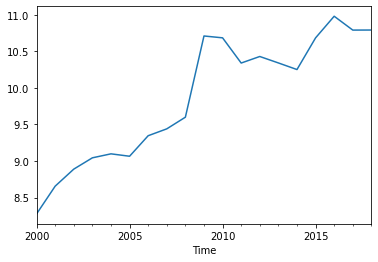

In [26]:
# printing the records for Canada
print(country_data.head())
country_data.plot()
plt.show()

In [27]:
# Checking For Stationarity  - ADF(Augmented Dickey Fuller Test)

from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)


In [28]:
adf_test(country_data)

1. ADF :  -1.6242288168589991
2. P-Value :  0.4705129963749948
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 18
5. Critical Values :
	 1% :  -3.859073285322359
	 5% :  -3.0420456927297668
	 10% :  -2.6609064197530863


In [35]:
# importing arima library
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 

X = country_data.values
size = int(len(X) * 0.66)


train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []


for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    



C:\Users\VR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=10.870071, expected=10.428594
predicted=10.506385, expected=10.340460
predicted=10.207340, expected=10.250131
predicted=10.267825, expected=10.683281
predicted=10.763492, expected=10.979034
predicted=10.949561, expected=10.789648
predicted=10.813739, expected=10.790469


In [36]:
# Checking the error rate of 
import math
error = mean_squared_error(test, predictions)
print('Test Root Mean Squared Error: %.3f' % math.sqrt(error))

Test Root Mean Squared Error: 0.259
